# Clean up of idsp dataset take by idsp_parser.py

* Remove duplicate rows. Camelot takes the full table on each page, replicated headers many times.
* Split the merged cases/deaths column for early years
* Move data located in the wrong column to the correct column
* Remove text characters from numerical columns
* Unify the datetime column format
* Unify the diseases
* Unify the state, district etc

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [2]:
df = pd.read_csv("IDSP_data.csv")

In [3]:
df

,Unnamed: 0,ID_code,state,district,disease,cases,deaths,start_date,report_date,status,comments,raw
0,0,5,?,?,?,7,12,?,?,[],?,5 7 12 1 2 1 1 144 71 40 36
1,1,NaN,?,?,?,34,17,?,?,[],?,34 17 15 17 10 7 5 3 2 2 1 1 1
2,2,3,?,?,?,2,2,?,?,[],?,3 2 2 1 1 1 1 0 20 40 60 80 100 120 140 160 ...
3,3,taken,Andhra Pradesh,Nellore,Acute Diarrheal Disease,43,0,27.06.09,30.06.09,['Under Control'],?,taken Nellore i. Acute Diarrhoeal Disease 43 ...
4,4,Pradesh,Andhra Pradesh,Prakasam,Acute Diarrheal Disease,12,0,25.06.09,27.06.09,['Under Control'],?,Pradesh Prakasam ii. Acute Diarrhoeal Disease ...
...,...,...,...,...,...,...,...,...,...,...,...,...
17371,17371,TN/RMN/2019/06/0161,?,?,?,21,00,05-02-19,11-02-19,['Under Control'],?,TN/RMN/2019/06/0161 Tamil Nadu Ramanathapura m...
17372,17372,TL/BLY/2019/06/0162,Madhya Pradesh,Bhopal,Food Poisoning,40,00,04-02-19,06-02-19,['Under Control'],?,TL/BLY/2019/06/0162 Telangana Jayashankar Bhup...
17373,17373,KN/CMN/2019/06/0163,Haryana,Karnal,Chicken Pox,31,00,21-01-19,?,['Under Surveillance'],?,KN/CMN/2019/06/0163 Karnataka Chamarajanagar a...
17374,17374,KL/WYN/2019/06/0164,Kerala,Wayanad,Food Poisoning,55,00,28-01-19,?,['Under Surveillance'],?,KL/WYN/2019/06/0164 Kerala Wayanad Food Poison...


# Get an idea of the completeness of the raw dataset

## Drop duplicate rows


In [4]:
df.drop_duplicates(inplace=True)
df = df.replace('?',np.nan)

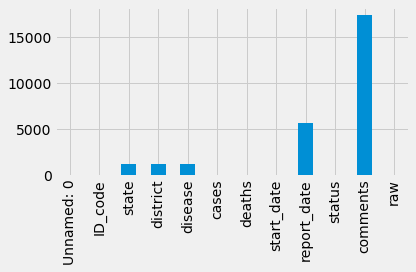

In [5]:
# missing data by column
plt.figure()
df.isna().sum().plot.bar(ax=plt.gca())
plt.tight_layout()
plt.show()

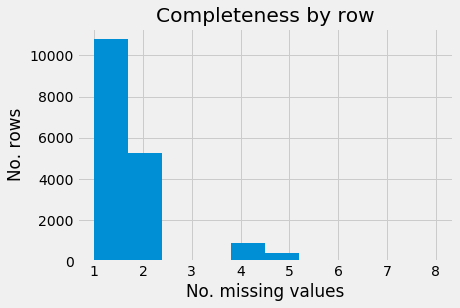

In [6]:
num_nans=[]
for i, row in df.iterrows():
    num_nans.append(row.isna().sum())
    
plt.figure()
plt.title('Completeness by row')
plt.hist(num_nans)
plt.xlabel('No. missing values')
plt.ylabel('No. rows')
plt.show()

## datetime

Only really concerned with start date.

In [7]:
print(f'number of nan dates = {df.start_date.isna().sum()}')
print(f'number of unique dates = {df.start_date.unique().shape[0]}')
print(f'number of invalid dates = {pd.to_datetime(df.start_date, errors="coerce").isna().sum()-df.start_date.isna().sum()}')
print(f'number of unique dates = {df.start_date.unique().shape[0]}')
print(f'number of duplicated dates = {df.start_date.duplicated().sum()}')


number of nan dates = 30
number of unique dates = 3777
number of invalid dates = 17
number of unique dates = 3777
number of duplicated dates = 13599


In [8]:
df[['start_date','report_date']] = df[['start_date','report_date']].apply(lambda x: pd.to_datetime(x, errors='ignore'))


## Cases, deaths to numeric

In [9]:
df[['cases','deaths']] = df[['cases','deaths']].apply(lambda x : pd.to_numeric(x, errors='coerce'))

## Diseases

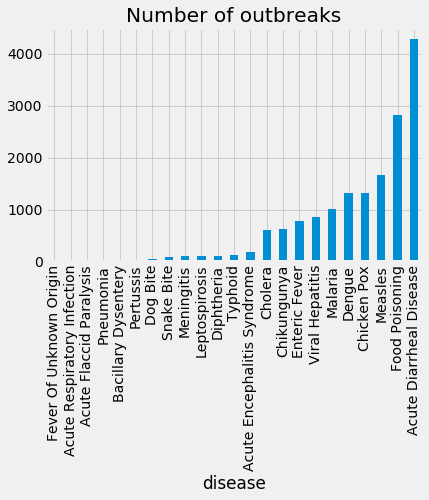

In [10]:
df.groupby('disease').count()['raw'].sort_values().plot.bar(title='Number of outbreaks')

## Output to csv file

In [61]:
from datetime import datetime as dt

df.to_csv(f'idsp_database_regex_cleaned_{dt.today()}.csv')

In [70]:
df[df.state.isna()]

,Unnamed: 0,ID_code,state,district,disease,cases,deaths,start_date,report_date,status,comments,raw
0,0,5,NaN,NaN,NaN,7.0,12.0,NaN,NaN,[],NaN,5 7 12 1 2 1 1 144 71 40 36
1,1,NaN,NaN,NaN,NaN,34.0,17.0,NaN,NaN,[],NaN,34 17 15 17 10 7 5 3 2 2 1 1 1
2,2,3,NaN,NaN,NaN,2.0,2.0,NaN,NaN,[],NaN,3 2 2 1 1 1 1 0 20 40 60 80 100 120 140 160 ...
22,22,Bengal,NaN,NaN,NaN,105.0,0.0,14.06.09,09.06.09,"['Under Control', 'Under Control']",NaN,Bengal Purulia xx. Acute Diarrhoeal Disease 1...
26,26,examination.,NaN,NaN,NaN,41.0,0.0,29.07.09,03.08.09,"['Under Control', 'Under control']",NaN,examination. 3. Kerala Kozhikode iv. Chikungun...
...,...,...,...,...,...,...,...,...,...,...,...,...
17357,17357,KN/GDG/2019/06/0147,NaN,NaN,NaN,58.0,0.0,05-02-19,05-02-19,['Under Surveillance'],NaN,KN/GDG/2019/06/0147 Karnataka Gadag Chickenpox...
17362,17362,MP/NIM/2019/06/0152,NaN,NaN,NaN,23.0,0.0,06-02-19,10-02-19,['Under Control'],NaN,MP/NIM/2019/06/0152 Madhya Pradesh Nimach Chic...
17366,17366,TN/MDR/2019/06/0156,NaN,NaN,NaN,19.0,0.0,05-02-19,07-02-19,['Under Control'],NaN,TN/MDR/2019/06/0156 Tamil Nadu Madurai Food Po...
17371,17371,TN/RMN/2019/06/0161,NaN,NaN,NaN,21.0,0.0,05-02-19,11-02-19,['Under Control'],NaN,TN/RMN/2019/06/0161 Tamil Nadu Ramanathapura m...


# Adding the geospatial element

The administrative boundaries from GADM.org are merged with the outbreak data by the state and district columns. This is complicated by shifting boundaries over time and variations in spelling.

`idsp_parser.py` includes a fuzzy matching routine which gets the districts and states to match those of the GADM level 2 admin areas. This is done in a state, district dictionary method which is robust against matching districts from one state with another state. But could be a problem because it can match similar but different district names.

In [77]:
print(f'there are {df.state.isna().sum()} records missing states and {df.district.isna().sum()} missing districts in the raw records')

there are 1293 records missing states and 1293 missing districts in the raw records


In [11]:
ind_2 = gpd.read_file('/Users/Angus_Laurenson/ownCloud/PML/PODCAST/INDIA/state_district_shapes/gadm36_IND_2.shp')
ind_3 = gpd.read_file('/Users/Angus_Laurenson/ownCloud/PML/PODCAST/INDIA/state_district_shapes/gadm36_IND_3.shp')

GADM files have the following levels.
 * NAME_0 is the country
 * NAME_1 is the state
 * NAME_2 is the district
 * NAME_3 is the sub-district (has many names such as block, tehsil, city and such


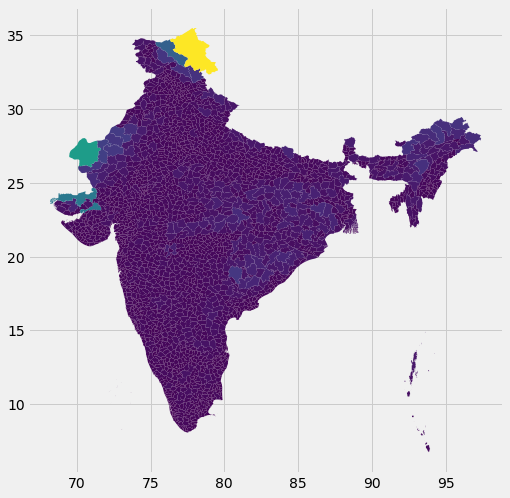

In [12]:
ind_3.plot(column=ind_3.geometry.area, figsize=(8,8))

## Unique state, district pairs in incidence dataframe

In [13]:
pd.Series()

/Users/Angus_Laurenson/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


Series([], dtype: float64)

In [14]:
pd.Series(df.state+' '+df.district).dropna().unique().shape[0]

611

In [15]:
district_locations = ind_2[['NAME_1','NAME_2','geometry']]\
                    .rename(columns={'NAME_1':'state','NAME_2':'district'})\
                    .dissolve(by=['state','district'],aggfunc='first')
district_locations

geometry
state               district                                                                   
Andaman and Nicobar Nicobar Islands           MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...
                    North and Middle Andaman  MULTIPOLYGON (((92.93898 12.22386, 92.93916 12...
                    South Andaman             MULTIPOLYGON (((92.47972 10.52056, 92.47945 10...
Andhra Pradesh      Anantapur                 POLYGON ((77.71420 13.76079, 77.71314 13.75074...
                    Chittoor                  POLYGON ((78.46293 12.63537, 78.46190 12.63228...
...                                                                                         ...
West Bengal         Pashchim Medinipur        POLYGON ((87.22874 21.95608, 87.22562 21.95712...
                    Purba Medinipur           MULTIPOLYGON (((88.03139 22.06056, 88.03139 22...
                    Puruliya                  POLYGON ((85.88916 23.15176, 85.88641 23.15335...
                    South 24 Parganas         MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...
                    Uttar Dinajpur            MULTIPOLYGON (((88.45732 25.59600, 88.45847 25...

[666 rows x 1 columns]

# Merge outbreaks with geospatial data on state and district columns

In [63]:
master = district_locations.merge(df,on=['state','district'])
master.to_file(f'idsp_database_regex_cleaned_{dt.today()}.shp')

# Plot outbreaks

Dropdown(description='Disease:', index=16, options=(nan, 'Food Poisoning', 'Meningitis', 'Acute Flaccid Paraly…

<Figure size 576x576 with 0 Axes>

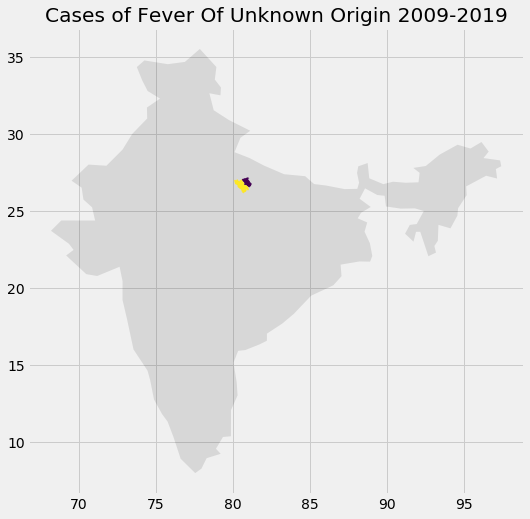

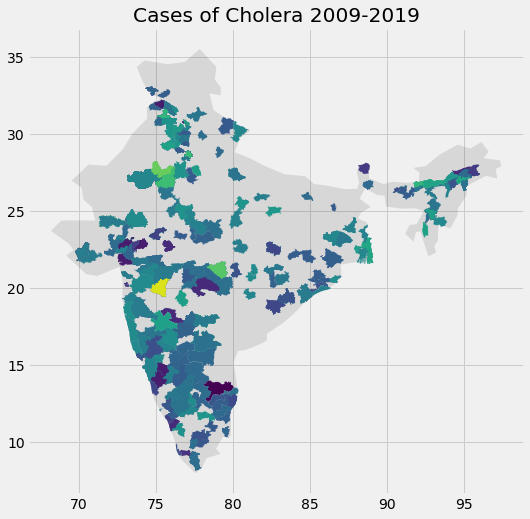

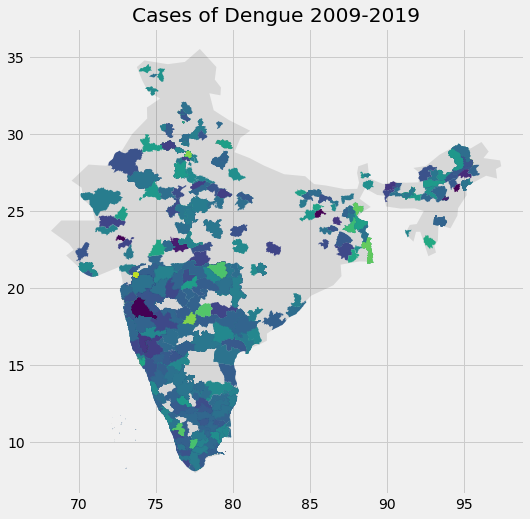

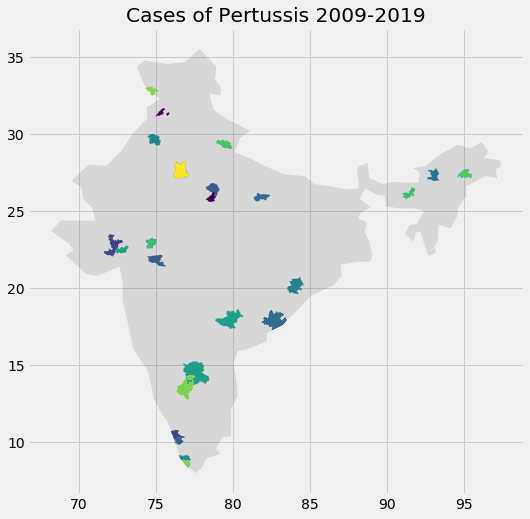

In [66]:
import ipywidgets as widgets
w = widgets.Dropdown(
    options=set(df.disease),
    value='Cholera',
    description='Disease:',
    disabled=False,
)

       
from matplotlib.colors import LogNorm
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

plt.figure(figsize=(8,8))

def plot_cases(change):
    
    if change['type'] == 'change' and change['name'] == 'value':
        plt.figure(figsize=(8,8))
        plt.title(f'Cases of {change["new"]} 2009-2019')

        world[world.name == "India"].plot(ax=plt.gca(),
                                          color='k',
                                          alpha=0.1,
                                         )
        master[master.disease == change['new']].plot(column='cases',norm=LogNorm(),ax=plt.gca())
        plt.show()
    
w.observe(plot_cases)

display(w)

In [78]:
master.disease.unique()

array(['Acute Diarrheal Disease', 'Diphtheria', 'Malaria',
       'Food Poisoning', 'Enteric Fever', 'Cholera', 'Typhoid',
       'Chicken Pox', 'Measles', 'Pertussis', 'Snake Bite', 'Chikungunya',
       'Dengue', 'Viral Hepatitis', 'Meningitis',
       'Acute Encephalitis Syndrome', 'Bacillary Dysentery',
       'Acute Respiratory Infection', 'Acute Flaccid Paralysis',
       'Dog Bite', 'Leptospirosis', 'Pneumonia',
       'Fever Of Unknown Origin'], dtype=object)

In [88]:
master[(master.disease == 'Cholera') | (master.disease == 'Acute Diarrheal Disease') | (master.disease == 'Food Poisoning')].to_file(f'idsp_database_regex_cleaned_geo_Cholera_ADD_FP_{dt.today()}.shp')

In [90]:
df[(df.disease == 'Cholera') | (df.disease == 'Acute Diarrheal Disease') | (df.disease == 'Food Poisoning')].to_csv(f'idsp_database_regex_cleaned_geo_Cholera_ADD_FP_{dt.today()}.csv')
